In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
df = pd.read_csv("anime_data.csv")
df

,user_id,item_id,rating
0,0,147,5.0
1,1,1512,4.5
2,1,599,4.0
3,1,2292,4.5
4,1,1078,3.0
...,...,...,...
8765940,79300,1496,4.0
8765941,79300,3999,4.5
8765942,79300,8535,4.5
8765943,79300,5765,4.0


In [3]:
anime = pd.read_csv("anime_id_titles.csv")
anime

,item_id,title
0,10,The Prince of Tennis
1,100,Neon Genesis Evangelion
2,1000,Full Metal Panic! The Second Raid
3,10000,22/7: Shampoo no Nioi ga Shita
4,10001,Oshiri Tantei: Puputto Fumutto Kaiketsu Dance
...,...,...
16616,9995,Kitsunetsuki: Kedamonodamono
16617,9996,Irodorimidori: Outsider Requiem
16618,9997,Kura Sushi
16619,9998,High School Fleet Movie


In [4]:
df = pd.merge(anime, df , on = "item_id")
df

,item_id,title,user_id,rating
0,10,The Prince of Tennis,34,4.0
1,10,The Prince of Tennis,106,5.0
2,10,The Prince of Tennis,132,4.5
3,10,The Prince of Tennis,212,4.5
4,10,The Prince of Tennis,247,4.5
...,...,...,...,...
8765851,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,56626,1.0
8765852,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,66153,2.5
8765853,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,70179,5.0
8765854,9999,Drive Agent Personal: Shiawase wo Mamoru Mono,73216,3.0


In [5]:
df.describe()[['rating']]

,rating
count,8.765856e+06
mean,3.819917e+00
std,9.996230e-01
min,5.000000e-01
25%,3.000000e+00
50%,4.000000e+00
75%,4.500000e+00
max,5.000000e+00


Verificacao dos animes mais populares 

In [6]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Death Note                              40675
Attack on Titan                         32990
Spirited Away                           27789
Sword Art Online                        27576
Naruto                                  26809
Fullmetal Alchemist: Brotherhood        24258
Code Geass: Lelouch of the Rebellion    23347
Tokyo Ghoul                             23027
Fullmetal Alchemist                     22253
Howl's Moving Castle                    22067
Name: rating, dtype: int64

Analise dos ratings

In [7]:
ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
ratings['rating_counts'] = pd.DataFrame(df.groupby('title')['rating'].count())
ratings


,rating,rating_counts
title,,
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",3.397273,550
"""Bungaku Shoujo"" Memoire",3.709983,581
"""Bungaku Shoujo"" Movie",3.765845,1136
"""Eiji""",2.739583,48
"""Eikou Naki Tensai-tachi"" Kara no Monogatari",2.625000,4
...,...,...
yourness: Kago no Naka ni Tori,3.178571,14
zap dog,1.812500,16
Üks Uks,1.500000,5


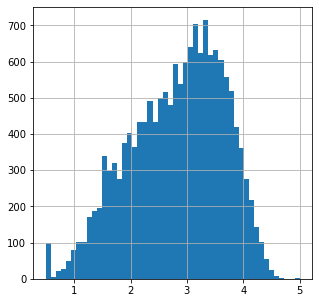

In [8]:
plt.figure(figsize=(5,5))
ratings['rating'].hist(bins=50)
plt.show()

<AxesSubplot:xlabel='rating', ylabel='rating_counts'>

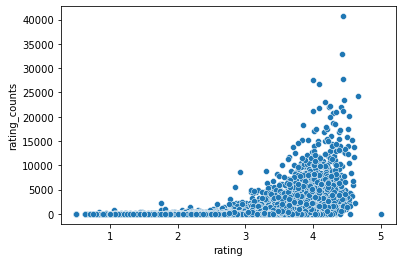

In [9]:
sns.scatterplot(x='rating', y='rating_counts', data=ratings)

In [10]:
print("users:", df.user_id.nunique())


users: 68199


In [11]:
ratings_per_id = df.pivot_table(index='user_id',columns='title',values='rating')
ratings_per_id.head()

title,"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi","""Bungaku Shoujo"" Memoire","""Bungaku Shoujo"" Movie","""Eiji""","""Eikou Naki Tensai-tachi"" Kara no Monogatari","""Eiyuu"" Kaitai","""Kiss Dekiru Gyoza"" x Mameshiba Movie","""Parade"" de Satie","""hitman"" bang: I=Fantasy",(K)NoW_NAME: Harvest,...,xxxHOLiC Shunmuki,y0c1e: To Dimension,yama: Arui wa Eiga no You na,yama: Masshiro,your name.,yourness: Kago no Naka ni Tori,zap dog,Üks Uks,ēlDLIVE,∞
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
AOT_ratings = ratings_per_id['Attack on Titan']
AOT_ratings.head(15)

user_id
0     NaN
1     NaN
2     5.0
3     NaN
4     NaN
5     NaN
6     3.5
7     NaN
8     5.0
9     4.0
10    3.5
12    NaN
13    NaN
14    NaN
15    NaN
Name: Attack on Titan, dtype: float64

In [13]:
similar_to_AOT = ratings_per_id.corrwith(AOT_ratings)

c:\Users\felip\anaconda3\lib\site-packages\numpy\lib\function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\felip\anaconda3\lib\site-packages\numpy\lib\function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [14]:
corr_AOT = pd.DataFrame(similar_to_AOT, columns=['Correlation'])
corr_AOT.dropna(inplace=True)
corr_AOT.head(15)

,Correlation
title,
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",0.202743
"""Bungaku Shoujo"" Memoire",0.338822
"""Bungaku Shoujo"" Movie",0.257078
"""Eiji""",0.273400
"""Eiyuu"" Kaitai",0.221758
"""Kiss Dekiru Gyoza"" x Mameshiba Movie",0.418474
"""Parade"" de Satie",0.753245
"""hitman"" bang: I=Fantasy",0.464117
(K)NoW_NAME: Harvest,0.538976


In [15]:
corr_AOT.sort_values('Correlation', ascending=False).head(15)

,Correlation
title,
Chainsaw Bunny: Deleted Scene,1.0
D5 Xiaodui 2nd Season,1.0
Oyasuminasai,1.0
Musunde Hiraite,1.0
Xi You Ji,1.0
Noriyuki Makihara: Sakura Melody,1.0
Geori-eui Mubeopja,1.0
Obake Zukan,1.0
Each Other,1.0


In [16]:
corr_AOT = corr_AOT.join(ratings['rating_counts'])
corr_AOT.head()

,Correlation,rating_counts
title,,
"""Bungaku Shoujo"" Kyou no Oyatsu: Hatsukoi",0.202743,550
"""Bungaku Shoujo"" Memoire",0.338822,581
"""Bungaku Shoujo"" Movie",0.257078,1136
"""Eiji""",0.273400,48
"""Eiyuu"" Kaitai",0.221758,52


In [17]:
corr_AOT[corr_AOT['rating_counts'] > 100].sort_values('Correlation', ascending=False).head(15)


,Correlation,rating_counts
title,,
Attack on Titan,1.000000,32990
Attack on Titan 2nd Season,0.670142,16756
Attack on Titan 3rd Season,0.557775,12804
Attack on Titan Movie 3: The Roar of Awakening,0.538902,665
Attack on Titan 3rd Season: Part II,0.535500,11628
The Reflection,0.533388,111
Attack on Titan: Ilse's Notebook,0.530584,5616
Attack on Titan: No Regrets,0.525415,6449
Attack on Titan Movie 4: Chronicle,0.514953,496
